<a href="https://colab.research.google.com/github/AlexanderSychev2005/stat_un/blob/main/ml_additional_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("survey_results_public.csv")

In [ ]:
dataset.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [ ]:
def convert_years(value):
    try:
      value = int(value)
      return value
    except:

      if "Less than 1 year" in value:
          return 0
      elif "More" in value:
          return 50


In [ ]:
def convert_age(value):
    if value == "Under 18 years old":
        return 0
    elif value == "65 years or older":
        return 65
    elif value == "Prefer not to say":
      return np.nan
    else:
        return int(value.split("-")[0])


In [ ]:
dataset = dataset[(dataset.ConvertedCompYearly <= 250000) & (dataset.ConvertedCompYearly >100)]

In [ ]:
dataset_for_prediction = dataset[["Employment",
                                  "EdLevel",
                                  "WorkExp",
                                  "YearsCodePro",
                                  "LanguageHaveWorkedWith",
                                  "ConvertedCompYearly",
                                  "RemoteWork",
                                  "Age",
                                  "OrgSize",
                                  "Country"]]
dataset_for_prediction = dataset_for_prediction.dropna()

In [ ]:
dataset_for_prediction["WorkExp"] = dataset_for_prediction["WorkExp"].apply(convert_years)
dataset_for_prediction["YearsCodePro"] = dataset_for_prediction["YearsCodePro"].apply(convert_years)
dataset_for_prediction["Age"] = dataset_for_prediction["Age"].apply(convert_age)

In [ ]:
dataset_for_prediction = dataset_for_prediction.dropna()
dataset_for_prediction.drop(columns=["LanguageHaveWorkedWith"], inplace=True)

<ipython-input-10-1d72e0a3d078>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_for_prediction.drop(columns=["LanguageHaveWorkedWith"], inplace=True)


In [ ]:
dataset_for_prediction

,Employment,EdLevel,WorkExp,YearsCodePro,ConvertedCompYearly,RemoteWork,Age,OrgSize,Country
2,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,23,250000.0,"Hybrid (some remote, some in-person)",45.0,"5,000 to 9,999 employees",United States of America
3,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,7,156000.0,"Hybrid (some remote, some in-person)",25.0,100 to 499 employees,United States of America
4,"Employed, full-time;Independent contractor, fr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,23456.0,Remote,25.0,20 to 99 employees,Philippines
5,"Employed, full-time",Some college/university study without earning ...,22,21,96828.0,Remote,35.0,100 to 499 employees,United Kingdom of Great Britain and Northern I...
6,"Employed, full-time",Some college/university study without earning ...,4,3,135000.0,Remote,35.0,"1,000 to 4,999 employees",United States of America
...,...,...,...,...,...,...,...,...,...
65094,"Employed, full-time;Independent contractor, fr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,16,161380.0,Remote,35.0,100 to 499 employees,United Kingdom of Great Britain and Northern I...
65095,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,4,82459.0,"Hybrid (some remote, some in-person)",25.0,20 to 99 employees,Germany
65101,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,5,52138.0,Remote,35.0,20 to 99 employees,United Kingdom of Great Britain and Northern I...
65103,"Employed, full-time",Some college/university study without earning ...,7,7,69608.0,"Hybrid (some remote, some in-person)",25.0,"1,000 to 4,999 employees",Netherlands


In [ ]:
# from sklearn.preprocessing import LabelEncoder
categorical_cols = ["Employment", "RemoteWork", "EdLevel", "OrgSize", "Country"]
dataset_for_prediction = pd.get_dummies(dataset_for_prediction, columns=categorical_cols, sparse=False).astype(int)

# label_encoders = {}
# for column in categorical_cols:
#     if dataset_for_prediction[column].dtype == 'object':
#         label_encoders[column] = LabelEncoder()
#         dataset_for_prediction[column] = label_encoders[column].fit_transform(dataset_for_prediction[column])



In [ ]:
corr_matrix = dataset_for_prediction.corrwith(dataset_for_prediction['ConvertedCompYearly'])


In [ ]:
corr_df = corr_matrix.to_frame()

In [ ]:
corr_matrix = corr_matrix.sort_values(ascending=False)
significant_corr = corr_matrix[abs(corr_matrix) >0.1]
significant_corr

,0
ConvertedCompYearly,1.000000
Country_United States of America,0.594886
YearsCodePro,0.356316
WorkExp,0.348333
Age,0.297911
RemoteWork_Remote,0.173475
"OrgSize_10,000 or more employees",0.145141
Country_Brazil,-0.127212
RemoteWork_In-person,-0.176292
Country_India,-0.225733


In [ ]:
X = dataset_for_prediction.drop(columns=['ConvertedCompYearly']).values
y = dataset_for_prediction['ConvertedCompYearly'].values
y = np.log1p(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)
ridge_y_pred = ridge_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
y_pred_original_scale = np.expm1(ridge_y_pred)
y_test_original_scale = np.expm1(y_test)

mse_original_scale = mean_squared_error(y_test_original_scale, y_pred_original_scale)
r2_original_scale = r2_score(y_test_original_scale, y_pred_original_scale)
rmse_original_scale = np.sqrt(mse_original_scale)

print(f'MSE (Original Scale): {mse_original_scale:.2f}')
print(f'R² (Original Scale): {r2_original_scale:.2f}')
print(f'RMSE (Original Scale): {rmse_original_scale:.2f}')

MSE (Original Scale): 1507650418.69
R² (Original Scale): 0.48
RMSE (Original Scale): 38828.47


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred_original_scale = np.expm1(y_pred)
y_test_original_scale = np.expm1(y_test)

mse_original_scale = mean_squared_error(y_test_original_scale, y_pred_original_scale)
r2_original_scale = r2_score(y_test_original_scale, y_pred_original_scale)
rmse_original_scale = np.sqrt(mse_original_scale)

print(f'MSE (Original Scale): {mse_original_scale:.2f}')
print(f'R² (Original Scale): {r2_original_scale:.2f}')
print(f'RMSE (Original Scale): {rmse_original_scale:.2f}')


MSE (Original Scale): 1508973725.01
R² (Original Scale): 0.48
RMSE (Original Scale): 38845.51


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=4, random_state=42)
rf_model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
importances = rf_model.feature_importances_
feature_names = dataset_for_prediction.drop(columns=['ConvertedCompYearly']).columns

import pandas as pd
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                              Feature  Importance
154  Country_United States of America    0.469014
1                        YearsCodePro    0.172974
0                             WorkExp    0.059078
143               Country_Switzerland    0.022406
25   OrgSize_10,000 or more employees    0.022238
..                                ...         ...
109                     Country_Nepal    0.000000
108                   Country_Myanmar    0.000000
64                    Country_Ecuador    0.000000
106                  Country_Mongolia    0.000000
159                  Country_Zimbabwe    0.000000

[160 rows x 2 columns]


In [ ]:
random_forest_y_pred = rf_model.predict(X_test)

In [ ]:
y_pred_original_scale = np.expm1(random_forest_y_pred)
y_test_original_scale = np.expm1(y_test)

mse_original_scale = mean_squared_error(y_test_original_scale, y_pred_original_scale)
r2_original_scale = r2_score(y_test_original_scale, y_pred_original_scale)
rmse_original_scale = np.sqrt(mse_original_scale)

print(f'MSE (Original Scale): {mse_original_scale:.2f}')
print(f'R² (Original Scale): {r2_original_scale:.2f}')
print(f'RMSE (Original Scale): {rmse_original_scale:.2f}')

MSE (Original Scale): 1564531204.50
R² (Original Scale): 0.43
RMSE (Original Scale): 39554.16


In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred_cvr = regressor.predict(X_test)


In [ ]:
y_pred_original_scale = np.expm1(y_pred_cvr)
y_test_original_scale = np.expm1(y_test)

mse_original_scale = mean_squared_error(y_test_original_scale, y_pred_original_scale)
r2_original_scale = r2_score(y_test_original_scale, y_pred_original_scale)
rmse_original_scale = np.sqrt(mse_original_scale)

print(f'MSE (Original Scale): {mse_original_scale:.2f}')
print(f'R² (Original Scale): {r2_original_scale:.2f}')
print(f'RMSE (Original Scale): {rmse_original_scale:.2f}')

MSE (Original Scale): 1532921177.67
R² (Original Scale): 0.45
RMSE (Original Scale): 39152.54


In [ ]:
# param_grid = [{'kernel':('linear', 'rbf'), 'C':[1, 10]}]
# regressor = SVR()
# gridsearch = GridSearchCV(regressor, param_grid, scoring='neg_mean_squared_error')
# gridsearch.fit(X_train, y_train)
# best_accuracy = gridsearch.best_score_
# best_parameters = gridsearch.best_params_
# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

<ipython-input-35-fba3015b6d63>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lang_corr_df, x="Language", y="Correlation", palette="viridis")


<Axes: xlabel='Language', ylabel='Correlation'>

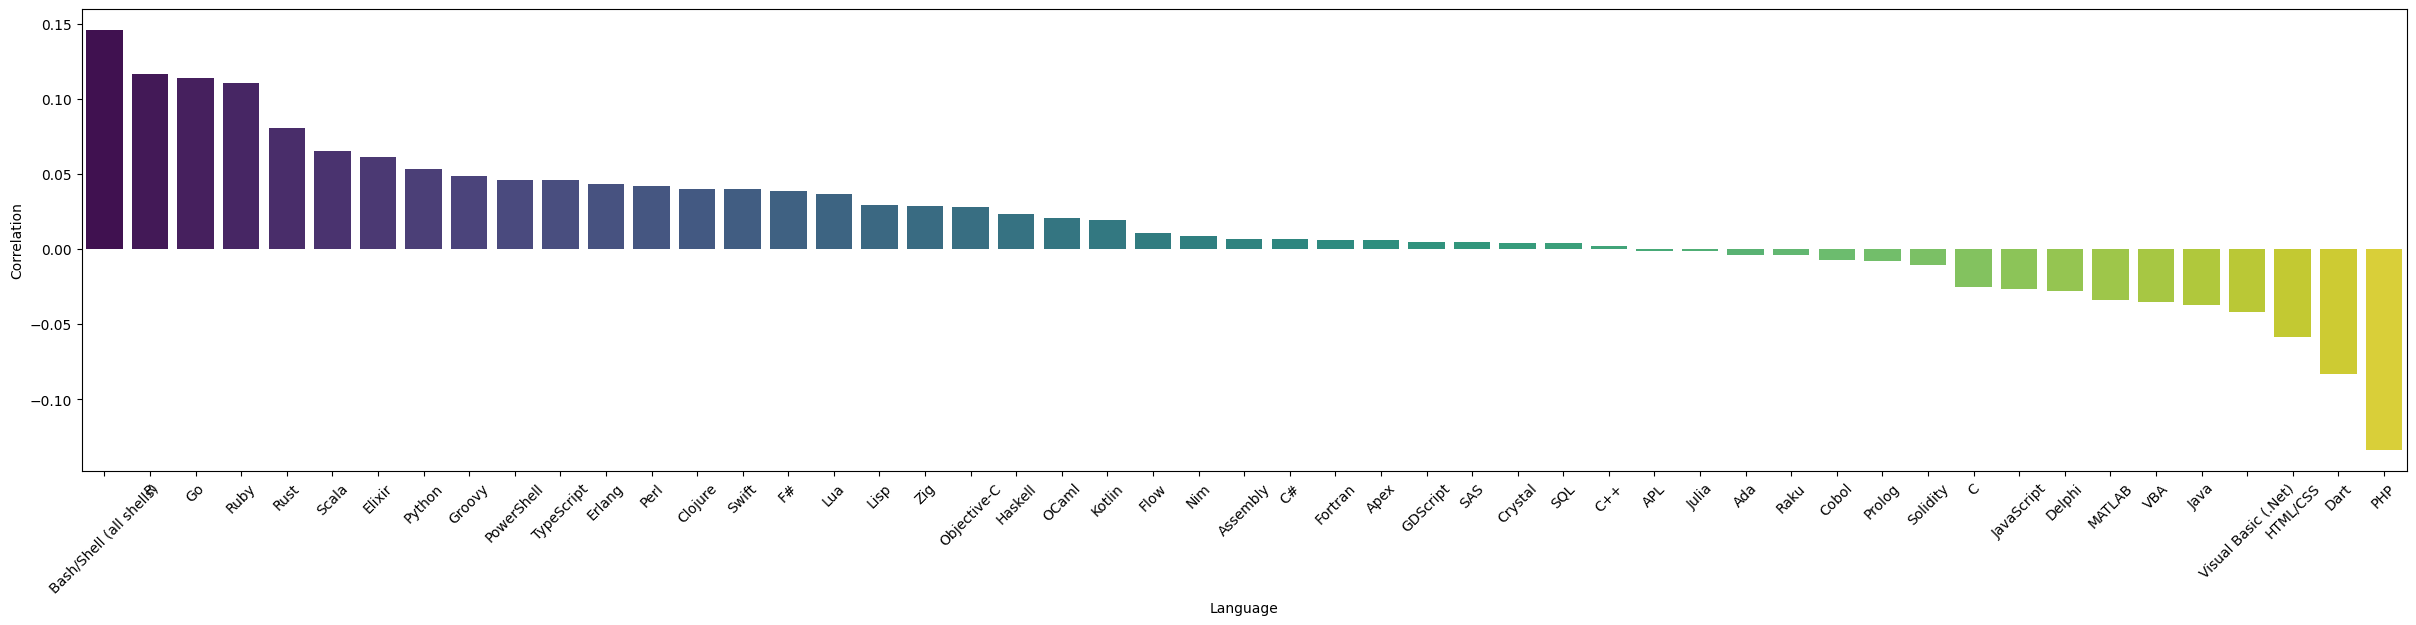

In [ ]:
lang_correlations = {}
for lang in all_lang_types:
  lang_correlations[lang] = dataset_for_prediction[f"LanguageHaveWorkedWith{lang}"].corr(dataset_for_prediction["ConvertedCompYearly"])
sorted_lang_correlations = sorted(lang_correlations.items(), key=lambda x: x[1], reverse=True)
lang_corr_df = pd.DataFrame(sorted_lang_correlations, columns=["Language", "Correlation"])

plt.figure(figsize=(30, 6))
plt.xticks(rotation=45)
sns.barplot(data=lang_corr_df, x="Language", y="Correlation", palette="viridis")

In [ ]:
lang_corr_df

,Language,Correlation
0,Bash/Shell (all shells),0.145802
1,R,0.116566
2,Go,0.113770
3,Ruby,0.110465
4,Rust,0.080765
5,Scala,0.065753
6,Elixir,0.061760
7,Python,0.053679
8,Groovy,0.048879
9,PowerShell,0.046314


In [ ]:
dataset_with_languages = dataset[['LanguageHaveWorkedWith', 'DevType', 'ConvertedCompYearly']]

In [ ]:
dataset_with_languages= dataset_with_languages.dropna()

In [ ]:
dataset_with_languages.isna().sum()

,0
LanguageHaveWorkedWith,0
DevType,0
ConvertedCompYearly,0


In [ ]:
all_dev_types = set()
dataset_with_languages["DevType"].str.split(";").apply(all_dev_types.update)

,DevType
1,None
2,None
3,None
4,None
5,None
...,...
89162,None
89166,None
89167,None
89170,None


In [ ]:
all_lang_types = set()
dataset_with_languages["LanguageHaveWorkedWith"].str.split(";").apply(all_lang_types.update)

,LanguageHaveWorkedWith
1,None
2,None
3,None
4,None
5,None
...,...
89162,None
89166,None
89167,None
89170,None


In [ ]:
for lang in all_lang_types:
    dataset_with_languages[f"LanguageHaveWorkedWith{lang}"] = dataset_with_languages["LanguageHaveWorkedWith"].apply(lambda x: 1 if lang in x else 0)
dataset_with_languages.drop(columns=["LanguageHaveWorkedWith"], inplace=True)

In [ ]:
for dev in all_dev_types:
    dataset_with_languages[f"DevType{dev}"] = dataset_with_languages["DevType"].apply(lambda x: 1 if dev in x else 0)
dataset_with_languages.drop(columns=["DevType"], inplace=True)

<ipython-input-167-22f313a85207>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lang_salary_df, x="Average Salary", y="Dev", palette="viridis")


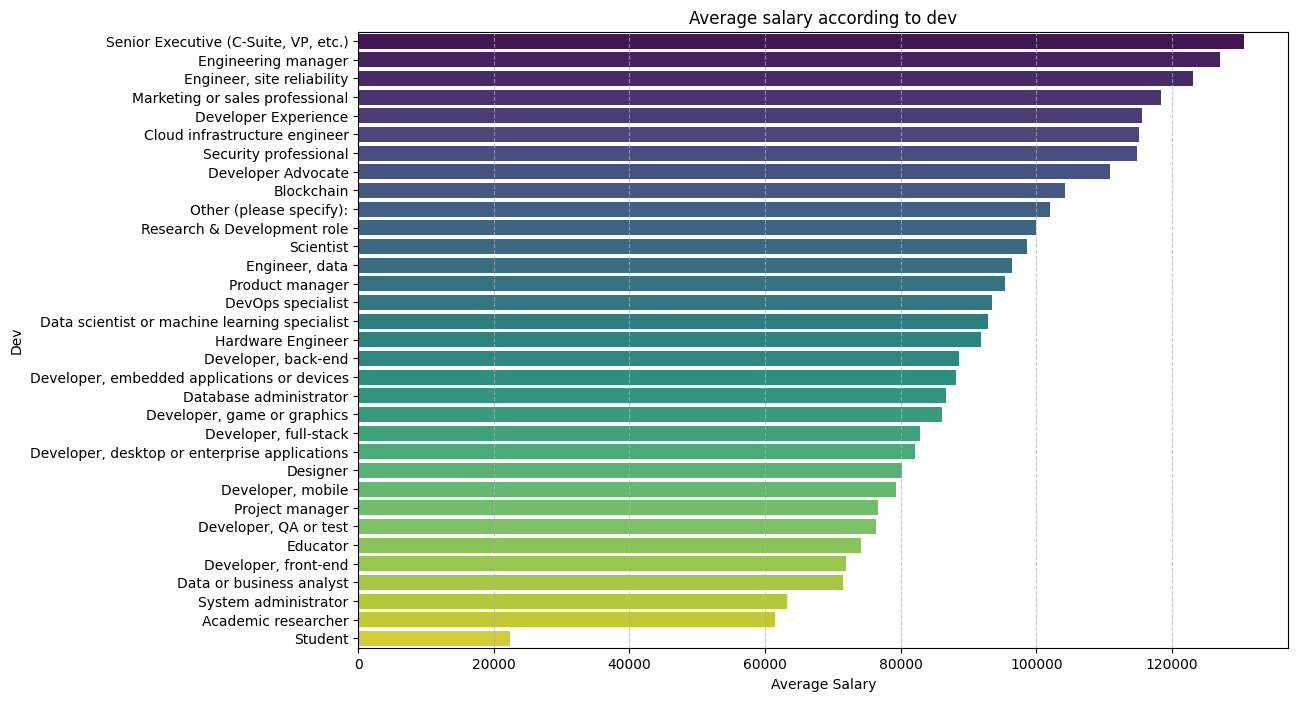

In [ ]:
lang_devs= {}
for dev in all_dev_types:
  lang_devs[dev] = dataset_with_languages[dataset_with_languages[f"DevType{dev}"] == 1]["ConvertedCompYearly"].mean()
sorted_lang_salaries = sorted(lang_devs.items(), key=lambda x: x[1], reverse=True)
lang_salary_df = pd.DataFrame(sorted_lang_salaries, columns=["Dev", "Average Salary"])

plt.figure(figsize=(12, 8))
sns.barplot(data=lang_salary_df, x="Average Salary", y="Dev", palette="viridis")
plt.title("Average salary according to dev")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

<ipython-input-133-405a005b1ef3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lang_salary_df, x="Average Salary", y="Language", palette="viridis")


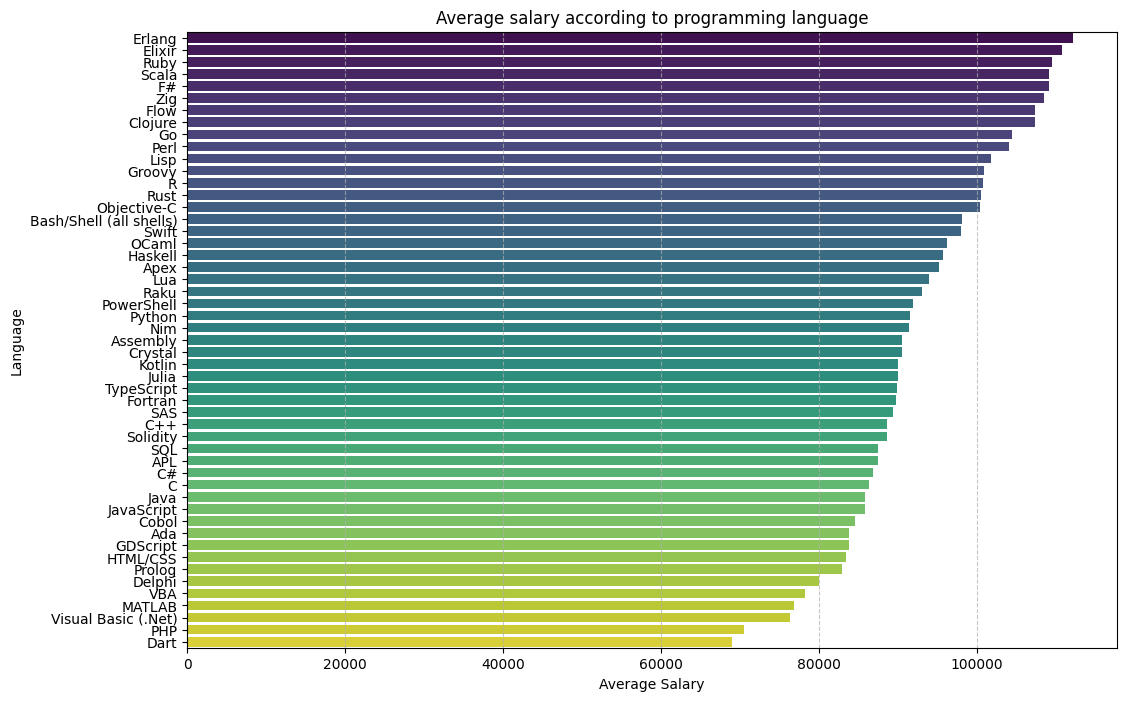

In [ ]:
lang_salaries = {}
for lang in all_lang_types:
  lang_salaries[lang] = dataset_with_languages[dataset_with_languages[f"LanguageHaveWorkedWith{lang}"] == 1]["ConvertedCompYearly"].mean()
sorted_lang_salaries = sorted(lang_salaries.items(), key=lambda x: x[1], reverse=True)
lang_salary_df = pd.DataFrame(sorted_lang_salaries, columns=["Language", "Average Salary"])

plt.figure(figsize=(12, 8))
sns.barplot(data=lang_salary_df, x="Average Salary", y="Language", palette="viridis")
plt.title("Average salary according to programming language")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

<ipython-input-38-dca87bfcda7b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Language', y='AvgSalary', data=avg_salary_by_language_df, palette="viridis")


<Axes: xlabel='Language', ylabel='AvgSalary'>

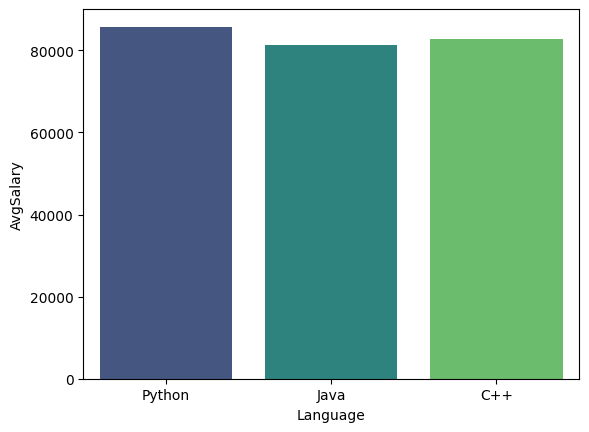

In [ ]:
languages = ['Python', 'Java', 'C++']
language_columns = ["LanguageHaveWorkedWithC++", "LanguageHaveWorkedWithPython", "LanguageHaveWorkedWithJava"]
avg_salary_by_language = []
for language in languages:

    language_data = dataset_for_prediction[dataset_for_prediction[f'LanguageHaveWorkedWith{language}'] == 1]
    avg_salary = language_data['ConvertedCompYearly'].mean()
    avg_salary_by_language.append((language, avg_salary))
avg_salary_by_language_df = pd.DataFrame(avg_salary_by_language, columns=['Language', 'AvgSalary'])
avg_salary_by_language_df
sns.barplot(x='Language', y='AvgSalary', data=avg_salary_by_language_df, palette="viridis")


In [ ]:
education_columns = [
    'EdLevel_Associate degree (A.A., A.S., etc.)',
    'EdLevel_Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
    'EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
    'EdLevel_Primary/elementary school',
    'EdLevel_Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
    'EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
    'EdLevel_Some college/university study without earning a degree',
    'EdLevel_Something else'
]


correlation_results = {}

for column in education_columns:

    correlation = dataset_for_prediction[column].corr(dataset_for_prediction['ConvertedCompYearly'])
    correlation_results[column] = correlation


for level, corr_value in correlation_results.items():
    print(f"Correlation between {level} and Salary: {corr_value}")

Correlation between EdLevel_Associate degree (A.A., A.S., etc.) and Salary: -0.0016606667291977513
Correlation between EdLevel_Bachelor’s degree (B.A., B.S., B.Eng., etc.) and Salary: 0.037849225473040815
Correlation between EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA, etc.) and Salary: 0.010293004965791894
Correlation between EdLevel_Primary/elementary school and Salary: -0.011228444007920859
Correlation between EdLevel_Professional degree (JD, MD, Ph.D, Ed.D, etc.) and Salary: 0.016152266781507517
Correlation between EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.) and Salary: -0.06697545774685967
Correlation between EdLevel_Some college/university study without earning a degree and Salary: -0.0252307005244966
Correlation between EdLevel_Something else and Salary: -0.03605304725217483


<ipython-input-15-18e69220bfdc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=edu_salary, palette="magma")


<Axes: title={'center': 'Salary dependency on type of education'}, xlabel='EdLevel', ylabel='ConvertedCompYearly'>

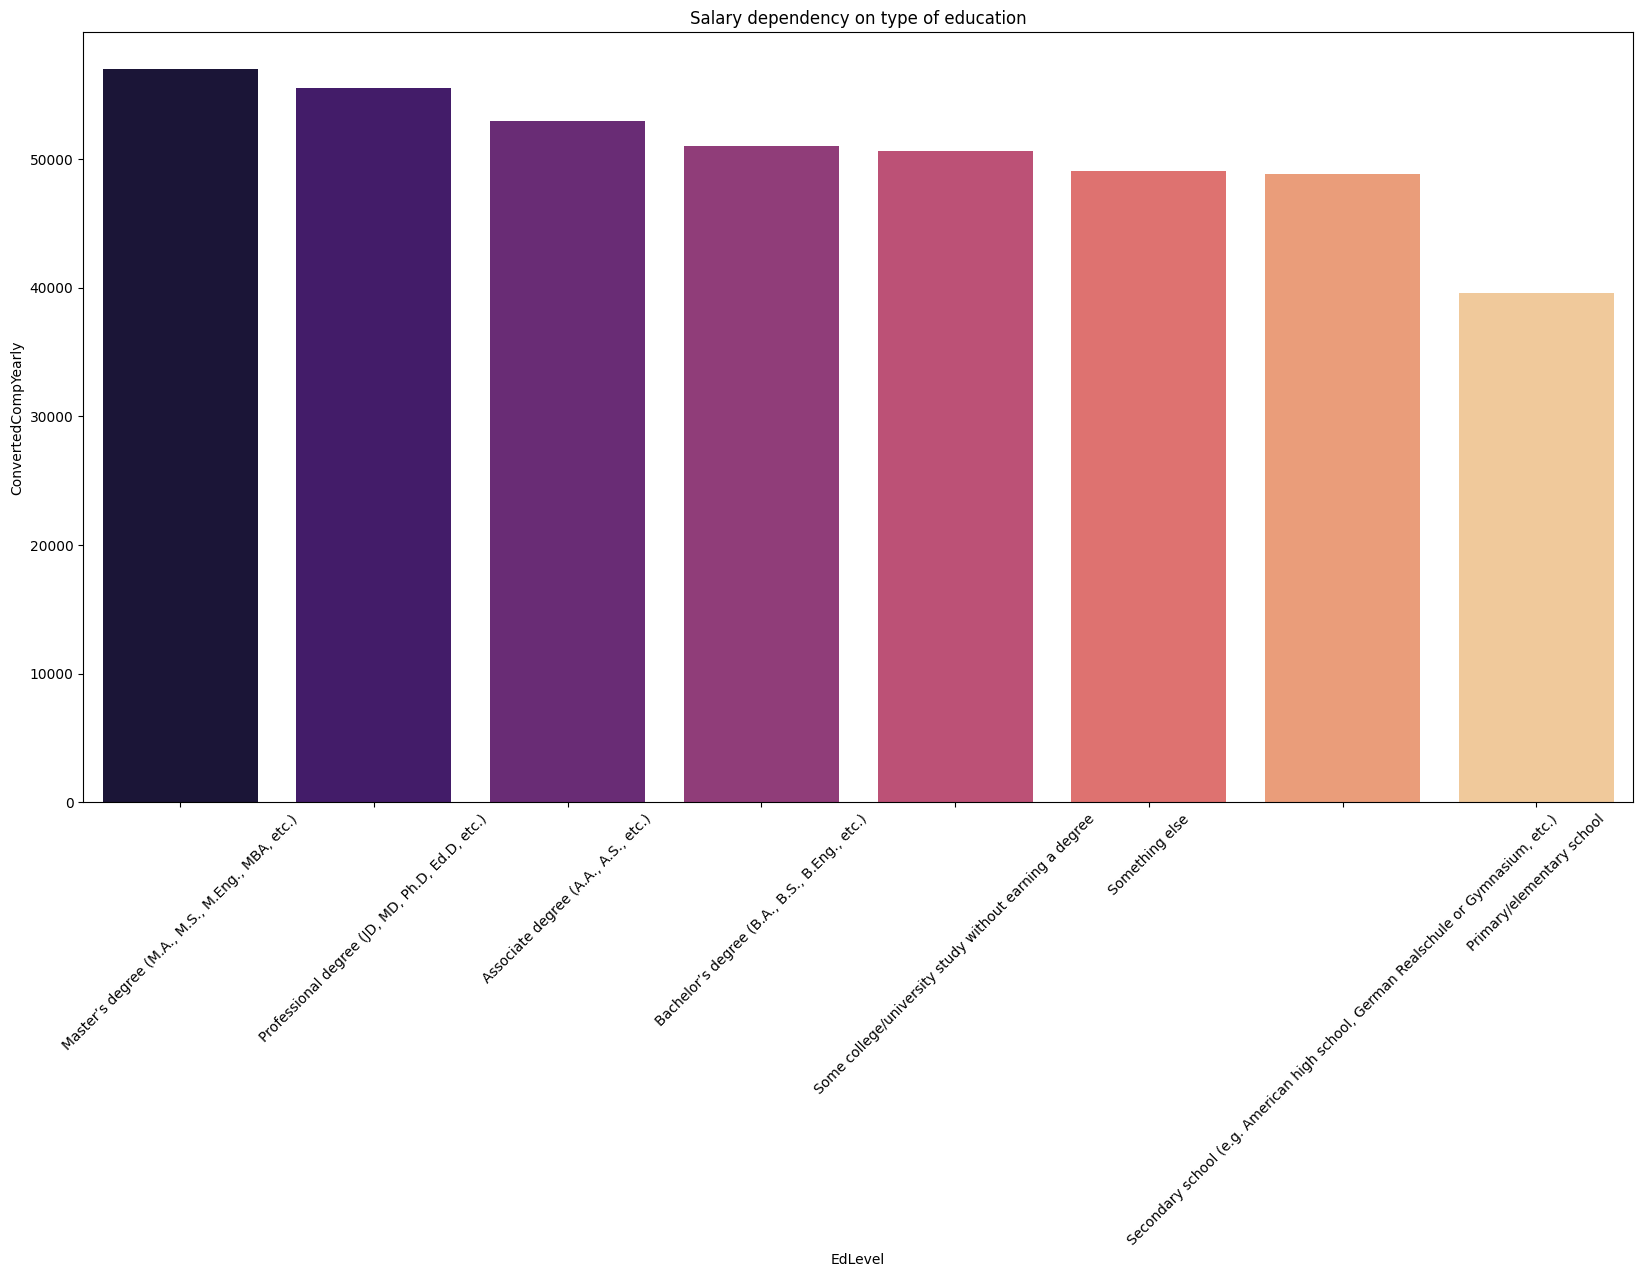

In [ ]:
edu_salary = dataset.groupby("EdLevel")["ConvertedCompYearly"].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 10))
plt.title("Salary dependency on type of education")
plt.xticks(rotation=45)
sns.barplot(data=edu_salary, palette="magma")

In [ ]:
dataset_for_prediction["WorkExp"].corr(dataset_for_prediction['ConvertedCompYearly'])

0.3460041580340338

<ipython-input-42-ba913a7739a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=edu_salary, palette="magma")


<Axes: title={'center': 'Salary dependency on the work experiance'}, xlabel='WorkExp', ylabel='ConvertedCompYearly'>

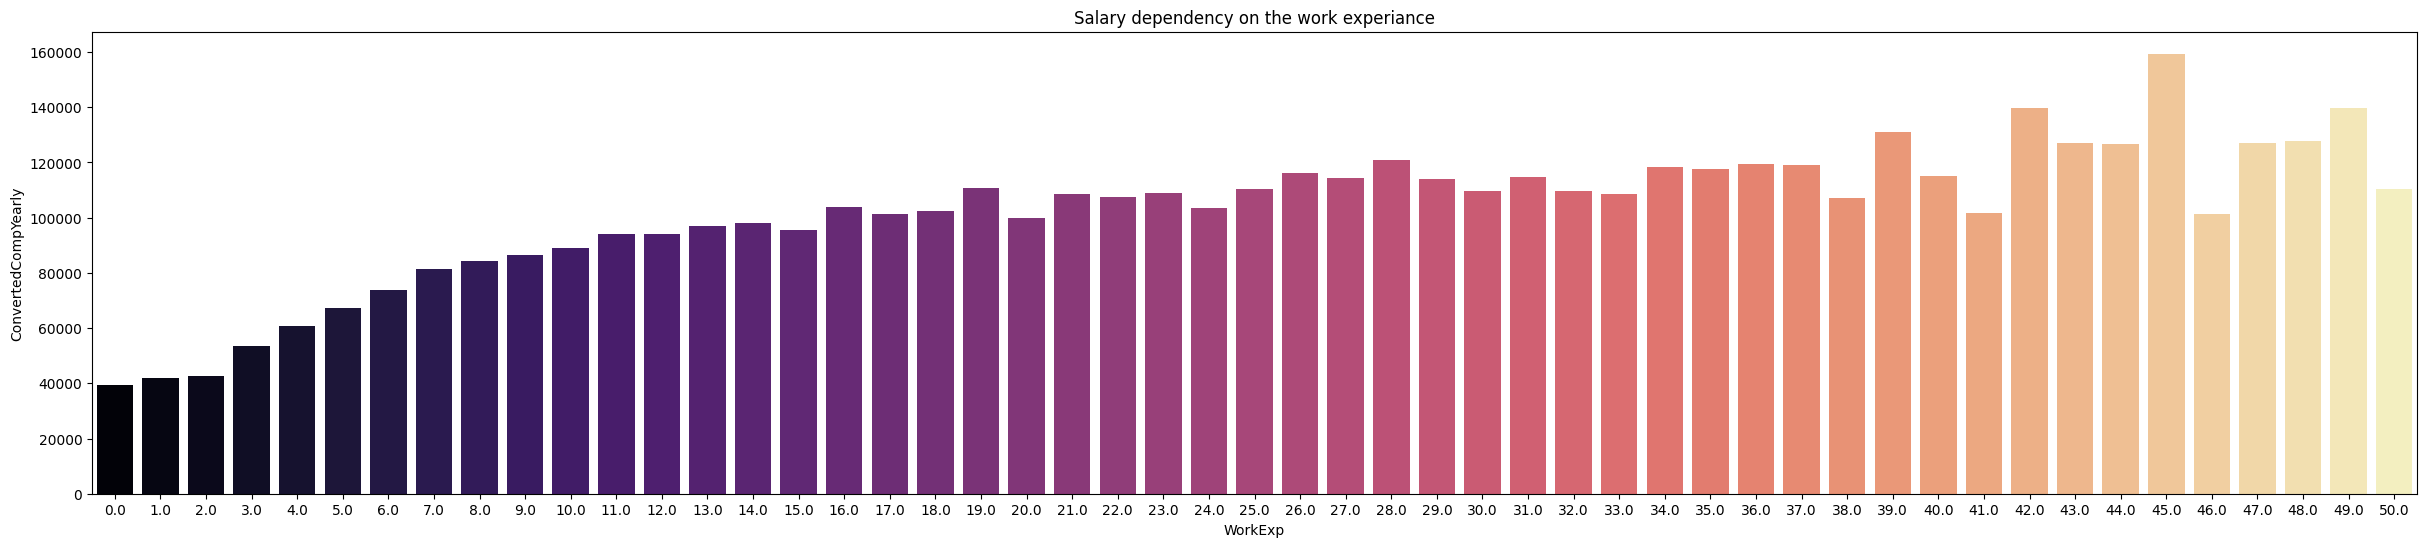

In [ ]:
edu_salary = dataset.groupby("WorkExp")["ConvertedCompYearly"].mean().sort_values(ascending=False)

plt.figure(figsize=(30, 6))
plt.title("Salary dependency on the work experiance")
sns.barplot(data=edu_salary, palette="magma")

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# clf = GradientBoostingRegressor(criterion='squared_error', learning_rate=0.1, random_state=42)
# clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# y_pred = clf.predict(X_test)

# # Calculate and display RMSE
# from sklearn.metrics import root_mean_squared_error, r2_score
# rmse = root_mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f"\nModel Accuracy: {rmse:.4f}")
# print(f"\nR2 score: {r2}")

In [ ]:
# y_pred_original_scale = np.power(y_pred, 2)
# y_test_original_scale = np.power(y_test, 2)

# mse_original_scale = mean_squared_error(y_test_original_scale, y_pred_original_scale)
# r2_original_scale = r2_score(y_test_original_scale, y_pred_original_scale)

# print(f'MSE (Original Scale): {mse_original_scale}')
# print(f'R² (Original Scale): {r2_original_scale}')

In [ ]:
from xgboost import XGBRegressor

regressor = XGBRegressor(n_estimators=100, learning_rate=0.05)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2 score: {r2}")

ValueError: X has 206 features, but RandomForestRegressor is expecting 283 features as input.

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
model = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)

In [ ]:
model.fit(X_train, y_train)

0:	learn: 1.0240885	total: 53.2ms	remaining: 53.2ms
1:	learn: 0.9960741	total: 58ms	remaining: 0us


In [ ]:
y_pred_cat = model.predict(X_test)

In [ ]:
# Calculate and display RMSE
from sklearn.metrics import root_mean_squared_error, r2_score
rmse = root_mean_squared_error(y_test, y_pred_cat)
r2 = r2_score(y_test, y_pred_cat)
print(f"\nModel Accuracy: {rmse:.4f}")
print(f"\nR2 score: {r2}")


Model Accuracy: 1.0358

R2 score: 0.2643710081195222


In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation="relu", solver="adam",
                   learning_rate_init=0.01, max_iter=500, random_state=42)
mlp.fit(X_train, y_train)


y_pred_mlp= mlp.predict(X_test)



In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
y_pred_original_scale = np.expm1(y_pred_mlp)
y_test_original_scale = np.expm1(y_test)

mse_original_scale = mean_squared_error(y_test_original_scale, y_pred_original_scale)
r2_original_scale = r2_score(y_test_original_scale, y_pred_original_scale)
rmse_original_scale = np.sqrt(mse_original_scale)

print(f'MSE (Original Scale): {mse_original_scale:.2f}')
print(f'R² (Original Scale): {r2_original_scale:.2f}')
print(f'RMSE (Original Scale): {rmse_original_scale:.2f}')

MSE (Original Scale): 1855838639.02
R² (Original Scale): 0.36
RMSE (Original Scale): 43079.45


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
from sklearn.pipeline import make_pipeline


In [ ]:
model = make_pipeline(poly, StandardScaler(), LinearRegression())


In [ ]:
model.fit(X_train, y_train)

# 📌 Делаем предсказания
y_pred = model.predict(X_test)

# 📌 Оцениваем модель
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"📊 Линейная регрессия с полиномами:")
print(f"  - MAE: {mae:.2f}")
print(f"  - RMSE: {rmse:.2f}")
print(f"  - R²: {r2:.2f}")

TypeError: got an unexpected keyword argument 'squared'